In [1]:
import numpy as np
import scipy as scipy
import time as time
import os


In [2]:
path = r'C:\Users\adam-1aeqn8vhvpjnv4u\OneDrive - Students RWTH Aachen University\RWTH\Simulation_Sciences\HiWi\02_Hungarian_algorithm'

file_list = []
file_list.append(path + '\coords_30p0s_03_10.txt')
file_list.append(path + '\coords_32p5s_03_10.txt')
file_list.append(path + '\coords_30p0s_02_30.txt')
file_list.append(path + '\coords_32p5s_02_30.txt')
file_list.append(path + '\coords_30p0s_04_100.txt')
file_list.append(path + '\coords_32p5s_04_100.txt')
file_list.append(path + '\coords_30p0s_05_300.txt')
file_list.append(path + '\coords_32p5s_05_300.txt')
file_list.append(path + '\coords_30p0s_06_1000.txt')
file_list.append(path + '\coords_32p5s_06_1000.txt')
file_list.append(path + '\coords_30p0s_01_3160.txt')
file_list.append(path + '\coords_32p5s_01_3160.txt')
file_list.append(path + '\coords_30p0s_04_6320.txt')
file_list.append(path + '\coords_32p5s_04_6320.txt')
file_list.append(path + '\coords_30p0s_07_12641.txt')
file_list.append(path + '\coords_32p5s_07_12641.txt')
file_list.append(path + '\coords_30p0s_10_17332.txt')
file_list.append(path + '\coords_32p5s_10_17332.txt')
file_list.append(path + '\coords_30p0s_13_36308.txt')
file_list.append(path + '\coords_32p5s_13_36308.txt')

file_list.append(path + '\coords_30p0s_07_72101.txt')
file_list.append(path + '\coords_32p5s_07_72101.txt')
file_list.append(path + '\coords_30p0s_07_142691.txt')
file_list.append(path + '\coords_32p5s_07_142691.txt')
file_list.append(path + '\coords_30p0s_07_284982.txt')
file_list.append(path + '\coords_32p5s_07_284982.txt')
file_list.append(path + '\coords_30p0s_07_569090.txt')
file_list.append(path + '\coords_32p5s_07_569090.txt')
file_list.append(path + '\coords_12p5s_07_1239132.txt')
file_list.append(path + '\coords_15p0s_07_1239132.txt')


tmp = True
for file in file_list:
    if os.path.isfile(file):
        tmp = True
    else:
        tmp = False
        print('file does not exist: ' + file)
print('All files exist: ', tmp)        

All files exist:  True


In [3]:
#print(type(positions_30s))
#print(np.shape(positions_30s))
#print(positions_30s.dtype)
# compute distacnce of particles between two datasets

def calc_phi_ij(coords_n, coords_n_minus_1):
    num_particles = np.shape(coords_n)[0]
    print('Compute distance function of {} particles'.format(num_particles))
    phi_ij = np.zeros((num_particles, num_particles))
    for i in range(3): # loop over x,y,z
        phi_ij += np.square(np.subtract.outer(coords_n[:,i], coords_n_minus_1[:,i]))
    phi_ij = np.sqrt(phi_ij)
    print('Finished computing distances')
    #print(phi_ij)
    return(phi_ij)



In [4]:
dict_timing = {}

for i in range(0, len(file_list), 2):
    positions_30s = np.loadtxt(file_list[i])
    positions_32p5s = np.loadtxt(file_list[i+1])

    print(' ')
    num_particles = np.shape(positions_30s)[0]
    print(num_particles)
    
    start_time_dist = time.time()
    distances = calc_phi_ij(positions_30s, positions_32p5s)
    end_time_dist = time.time()
    
    displacements = positions_32p5s - positions_30s
    
    start_time_hung = time.time()
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(distances)
    end_time_hung = time.time()
    
    error = np.sum(distances[row_ind, col_ind])
    #print('row indices: ', row_ind)
    is_row_unique = np.all(1 == np.unique(row_ind, return_counts=True)[1])
    print('row unique : ', is_row_unique)
    #print('col indices: ', col_ind)
    is_col_unique = np.all(1 == np.unique(col_ind, return_counts=True)[1])
    print('col unique : ', is_col_unique)
    print('cummulative distance: ', error)
    assignment_diff = positions_30s[col_ind] - positions_32p5s[row_ind]
    runtime_dist = end_time_dist - start_time_dist
    runtime_hung = end_time_hung - start_time_hung
    runtime_all = runtime_dist + runtime_hung
    print('runtime dist[s]: ', runtime_dist)
    print('runtime hung[s]: ', runtime_hung)
    print('runtime all[s]: ', runtime_all)
    dict_timing[str(num_particles)] = [num_particles, runtime_dist, runtime_hung, runtime_all]
    

 
10
Compute distance function of 10 particles
Finished computing distances
row unique :  True
col unique :  True
cummulative distance:  0.12134994340482899
runtime dist[s]:  0.0
runtime hung[s]:  0.53444504737854
runtime all[s]:  0.53444504737854
 
30
Compute distance function of 30 particles
Finished computing distances
row unique :  True
col unique :  True
cummulative distance:  0.4128763170452517
runtime dist[s]:  0.0
runtime hung[s]:  0.0
runtime all[s]:  0.0
 
100
Compute distance function of 100 particles
Finished computing distances
row unique :  True
col unique :  True
cummulative distance:  1.3426818353331014
runtime dist[s]:  0.0
runtime hung[s]:  0.0
runtime all[s]:  0.0
 
300
Compute distance function of 300 particles
Finished computing distances
row unique :  True
col unique :  True
cummulative distance:  3.1699107114854037
runtime dist[s]:  0.0030066967010498047
runtime hung[s]:  0.0010006427764892578
runtime all[s]:  0.0040073394775390625
 
1000
Compute distance functio

MemoryError: Unable to allocate 605. GiB for an array with shape (284982, 284982) and data type float64

[[1.00000000e+01 0.00000000e+00 5.34445047e-01 5.34445047e-01]
 [3.00000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.00000000e+02 3.00669670e-03 1.00064278e-03 4.00733948e-03]
 [1.00000000e+03 2.39832401e-02 3.69365215e-02 6.09197617e-02]
 [3.16000000e+03 2.47687817e-01 8.41995955e-01 1.08968377e+00]
 [6.32000000e+03 1.04938817e+00 3.04151607e+00 4.09090424e+00]
 [1.26410000e+04 3.79413629e+00 1.65049269e+01 2.02990632e+01]
 [1.73320000e+04 6.81854010e+00 4.98594847e+01 5.66780248e+01]
 [3.63080000e+04 3.02149341e+01 3.13580740e+02 3.43795674e+02]
 [7.21010000e+04 1.34453141e+02 3.63221857e+03 3.76667171e+03]
 [7.90140000e+04 2.08930802e+02 3.21056070e+03 3.41949150e+03]]


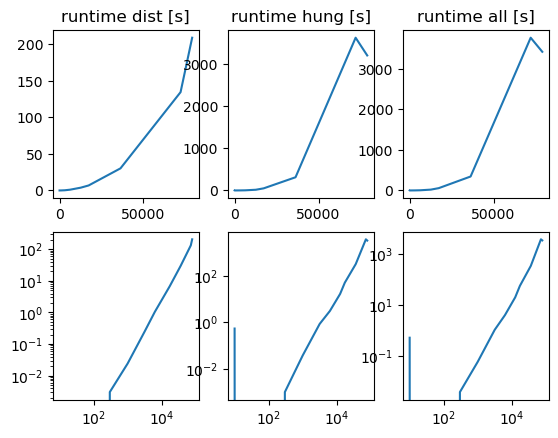

In [5]:
#print(dict_timing)

import matplotlib.pyplot as plt

a = np.array([list(item) for item in dict_timing.values()])

print(a)
    

fig, axs = plt.subplots(2,3)
axs[0,0].set_title('runtime dist [s]')
axs[0,0].plot(a[:,0], a[:,1])
axs[0,1].set_title('runtime hung [s]')
axs[0,1].plot(a[:,0], a[:,2])
axs[0,2].set_title('runtime all [s]')
axs[0,2].plot(a[:,0], a[:,3])
axs[1,0].loglog(a[:,0], a[:,1])
axs[1,1].loglog(a[:,0], a[:,2])
axs[1,2].loglog(a[:,0], a[:,3])










#%matplotlib widget
#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
##ax.scatter(particles_coords[10,:,0], particles_coords[10,:,1], particles_coords[10,:,2])
##colors = np.zeros_like(positions_30s[:,0])
##colors[np.where(positions_30s[:,0]>0)]=1
##c=colors
#colors = np.linspace(0,1,np.shape(positions_30s)[0])
#ax.scatter(positions_30s[:,0], positions_30s[:,1], positions_30s[:,2], s=150, marker="x", c=colors)
#ax.scatter(positions_32p5s[:,0], positions_32p5s[:,1], positions_32p5s[:,2], s=150, c=colors)
#ax.quiver(positions_30s[:,0], positions_30s[:,1], positions_30s[:,2], displacements[:,0], displacements[:,1], displacements[:,2])
#ax.quiver(positions_32p5s[:,0], positions_32p5s[:,1], positions_32p5s[:,2], assignment_diff[:,0], assignment_diff[:,1], assignment_diff[:,2])
#ax.set_aspect('equal')